<a href="https://colab.research.google.com/github/fatimasadiq/My_first_project/blob/master/SelfDrive_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Self Driving Car Sentiment Analysis
Steps are given below :
1. Data Extraction (but self Driving car data is taken from kaggle)
2.Preprocessing of data is done
3.Frequecy of words is generated.
4.Word Cloud is generated
5.Sentiment Aalysis is done
6.Heatmap is still progress

In [0]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
#import pandas as pd
import time
import csv

In [0]:
import pandas as pd
import numpy as np
import keras
from keras.preprocessing.text import Tokenizer
tk = Tokenizer()
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('english'))
import string
import inflect
import seaborn as sn
p = inflect.engine()

In [39]:
!pip install twitter-text-python

In [0]:
#Tweet Preprocessing

# emojis , special Character, URLS, tags
from ttp import ttp
import re
def cleanUrls(tweet):
    p = ttp.Parser()
    cleaned = tweet
    urls = p.parse(tweet).urls
    tags = p.parse(tweet).tags
    #schar = p.parse(tweet).schar
    # replies = p.parse(tweet).reply
    # print('replies', replies)
    for url in urls:
        cleaned = cleaned.replace(url, '')
    for tag in tags:
        cleaned = cleaned.replace('#'+tag, '')
    #for spchr in schar:
       #cleaned = cleaned.replace('ÃŒÂ¢â€°Ã¢Ã‚â€°Ã£Â¢s' ,'')

    print('.')
    return cleaned



In [88]:
import pandas as pd
#from tweetProcess import cleanUrls

tweets = pd.read_csv('data/Twitter-sentiment-self-drive-DFE-textonly.csv',encoding="ISO-8859-1", usecols=['tweets'])
for index, tweet in tweets.iterrows():
    c = cleanUrls(tweet[0])
    if len(c) > 40:
        df = pd.DataFrame([c])
        df.to_csv('cleaned.csv', mode='a', header=False, index=None)
print('finished')


Streaming output truncated to the last 5000 lines.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

In [89]:
df = pd.read_csv('data/Twitter-sentiment-self-drive-DFE-textonly.csv',encoding="ISO-8859-1", usecols=['tweets'])
df.head()

,tweets
0,Two places I'd invest all my money if I could:...
1,Awesome! Google driverless cars will help the ...
2,If Google maps can't keep up with road constru...
3,Autonomous cars seem way overhyped given the t...
4,Just saw Google self-driving car on I-34. It w...


In [0]:
def is_Mention(word):
      if word[0] == '@' or word[0] == '#':
            return True
      return False

def is_Number(word):
      try:
        int(word)
        return True
      except:
        return False

def is_RT(word):
  return word == 'rt'

def is_link(word):
  urls = re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', word)
  return len(urls) > 0

def is_stop_word(word):
  return word in stop_words

def has_sc(word):
  pat = r'[|\^&+()\%*/=!>.,:?"\'\!ì¡‰ûó0123456789`@Ã$ŒÂ¢â€°Ã¢Ã‚Ã¥]'
  sc = re.findall(pat, word)
  return len(sc) > 0

In [0]:
cleaned = []
for index, tweet in df.iterrows():
  words = tweet[0].split()
  # print(len(words))
  tweet = ''
  for word in words:
    word = word.lower().strip()
    # print(word)    
    if is_Mention(word) or is_Number(word) or is_RT(word) or is_link(word) or is_stop_word(word) or has_sc(word):
      pass
      # tweet = tweet.replace(word, " ")             
    else:
      tweet = " " + tweet + word + " "

  cleaned.append(tweet.strip())

In [0]:
cleaned_tweets = np.array(cleaned)
#pd.DataFrame(cleaned_tweets, columns=None).to_csv('cleaned_tweets.csv', index=None)

In [0]:
#Frequency Generation for the Word Cloud
#  lets make a histogram first and store it in csv
import pandas as pd
import pprint
stopWords = {'ourselves', 'hers', 'between', "let's", '&amp;', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than'}
tweets = pd.read_csv('data/cleaned_tweets.csv',encoding="ISO-8859-1", header=None)
text = ''
freq = {}
for index, tweet in tweets.iterrows():
    words = tweet[0].split()
    for word in words:
        word = word.lower()
        if len(word) > 3 and word[0] != '@' and word not in stopWords:
            if word not in freq.keys():
                freq[word] = 1
            else:
                freq[word] += 1

# print(freq)
df = pd.Series(freq).to_frame()
df.to_csv('frequency.csv', mode='w')

# pp = pprint.PrettyPrinter(indent=4)
# pp.pprint(freq)

In [0]:
# now you have to do some manual changes in frequency file, by adding a row  and give i name words and frequency and sort it from largest to smallest

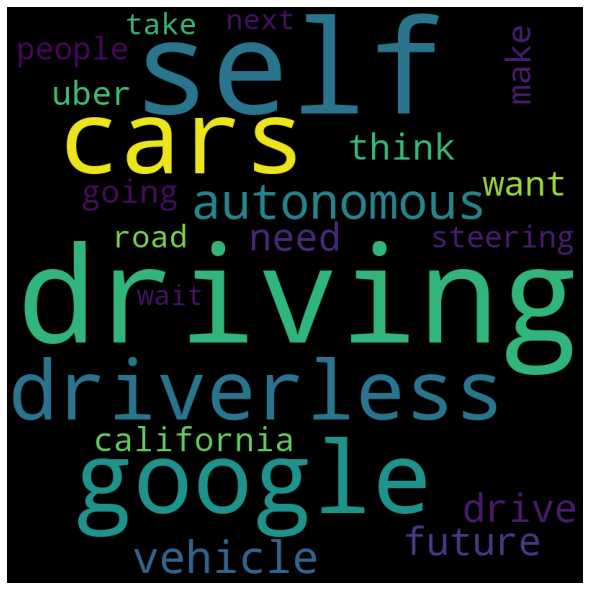

In [64]:
#Word Cloud Generation , The result  is taking on top 90 words

# Python program to generate WordCloud
# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file
# df = pd.read_csv(r"Youtube04-Eminem.csv", encoding="latin-1")
df = pd.read_csv('data/cleaned_tweets.csv', header=None)
comment_words = ' '
stopwords = set(STOPWORDS)
stopWords2 = {'ourselves', 'first','still','could','says','hers', 'between', "let's", 'amp', '&amp;', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than'}
tweets = pd.read_csv('data/frequency.csv', usecols=['words'], nrows=30)
hfwords = set()
for index, tweet in tweets.iterrows():
    hfwords.add(tweet[0])


# iterate through the csv file
for index, val in df.iterrows():
    # typecaste each val to string
    val = str(val[0])
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    for word in tokens:
        if len(word) > 3 and word[0] != '@' and word not in stopWords2 and word in hfwords:
            comment_words = comment_words + word + ' '
wordcloud = WordCloud(width=800, height=800,
                      background_color='black',
                      stopwords=stopwords,
                      collocations=False,
                      min_font_size=5).generate(comment_words)
# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [67]:
 # Sentiment Analysis of tweets
 import pandas as pd
# from tweetProcess import cleanUrls
# import numpy as np
def sentimentAnalysis(points):
    if points > 0:
        return 'Positive'
    if points < 0:
        return 'Negative'
    return 'Neutral'


pWords = pd.read_csv('data/positiveWords.csv', encoding="ISO-8859-1", usecols=['positive'])
nWords = pd.read_csv('data/positiveWords.csv', encoding="ISO-8859-1", usecols=['negative'])
tweets = pd.read_csv('data/cleaned_tweets.csv', encoding="ISO-8859-1", nrows=100)

sent = []
p = []
text = []
pos =[]
neg = []

for index, tweet in tweets.iterrows():
    points = 0
    noofpositivewords=0
    noofnegativewords=0
    tweetArr = tweet[0].split()
    for index, word in pWords.iterrows():
            if str(word[0]) in tweetArr:
                noofpositivewords +=1
                points += 1

    for index, word in nWords.iterrows():
            if str(word[0]) in tweetArr:
                noofnegativewords +=1
                points -= 1

    p.append(points)
    text.append(tweet[0])
    sent.append(sentimentAnalysis(points))
    pos.append(noofpositivewords)
    neg.append(noofnegativewords)
    print(len(p))

dicts = {'tweet': text, 'points': p, 'sentiment': sent, 'noofpositivewords': pos, 'noofnegativewords' : neg}
df = pd.DataFrame(dicts)
df.to_csv('data/sentiments.csv', mode='w', index=None)
print('finished')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
finished


In [0]:
# Heatmap

In [0]:
freq = {}
for tweet in cleaned_tweets:
  for word in tweet.split():
    if word in freq:
      freq[word] +=1
    else:
      freq[word] = 0


In [0]:
word_frequency = np.array(list(freq.items()))

In [0]:
nouns = ['cars','vehicle','google','wheel',]
verbs = ['driverless',	'self-driving',	'autonomous',	'love',	'driving','cool','technology']

In [259]:
cleaned_tweets[0]

'two places invest money printing self-driving'

In [0]:
# dict = [noun-verb-count]
dic = []
for noun in nouns:
  for verb in verbs:
    count = 0
    for tweet in cleaned_tweets:
      for word in tweet.split():
        word = word.lower()
        if word.lower() == verb:
          if noun in tweet.split() or p.plural(noun) in tweet.split():
            count += 1
    dic.append([noun, verb, count])


In [0]:
nouns_verbs_freq = np.array(dic)

In [0]:
df3 = pd.DataFrame(nouns_verbs_freq, columns=['noun', 'verb', 'frequency']).to_csv('nouns-verbs-frequency.csv', index=None) 

In [0]:
flights_long = pd.read_csv('nouns-verbs-frequency.csv')

In [0]:
flights = flights_long.pivot("noun", "verb", "frequency")

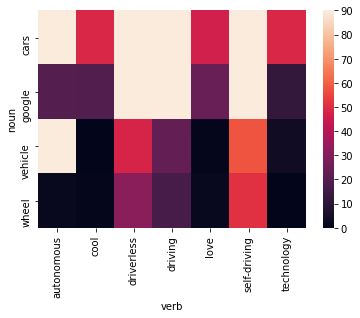

In [265]:
ax = sn.heatmap(flights , vmin=0, vmax=90)